# # Import necessary libraries 

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Lets prepare a model for a coin toss !

In [2]:
#will call the function coin_toss
#N-number of coin toss
Nstring=input("Enter the number of coin toss:")
N=int(Nstring)
def coin_toss(N):
    return np.random.choice(['H','T'],size=N)
toss=coin_toss(N)
print("Throws:"," ".join(toss))
print("Heads count", np.sum(toss=='H'))
#or you can write 
print("Heads count alt", np.count_nonzero(toss=='H'))
print("Probability of heads:" ,np.sum(toss=='H')/N)


Enter the number of coin toss:500
Throws: H H T T H H H T T H T H T T T T H T H T T H T H T T T H H H H H T H T H H H T H T H H H T H T T H T H T T H H H H H H T T T H T T T H H T H T H H T H H T H H H T H H H T T T T T H T H H T T T T H H H H H H H H T H T H H T T H H T T H H H H H T H H H H H T H H T H H H H T T H H H T T H H T T T H T T H H H T T H H H T H H T H H H T H H H T H H T H H T T H T H T T H T T H H T H H T H T H T T T T H T T H T H H T H H H H T T T T H H H H H T H T T H T H T H T H T H T H H T T T T H H T T T H T T T T H H T H T H T T H H T T T H H H H T T H H T T H H H T T H T T H T T H H T T T H H T H H H T T T T T H T T H T H T H T T T T T H H T T H H T H T H H H H T H H T T H T T T H T H H T T T T H T H H T H T H T T T H T H H T H H H T T T H T T T H H H T T T T H H H H H T T T H H T H T H T H T T T T H H T H H T T T H T T T H H H H H T H H H T H T H T H H H T H T T H H T T H H T T T T T H T H H H H T T T T T H T T H T H H H H T H H T H H T H T T H T T H H H T T H H 

# lets look at multiple trials 

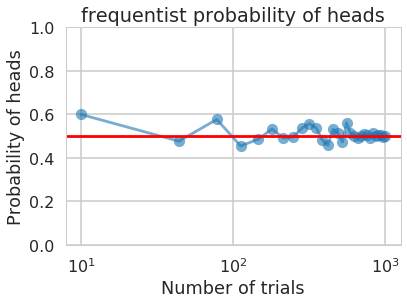

In [3]:
p=[]
Trials=np.linspace(10,1000,30,dtype=int)
for N in Trials :
    toss=coin_toss(N)
    p1= float("{0:.3f}".format(np.sum(toss=='H')/N,3))
    p.append(p1)
plt.plot(Trials, p, 'o-', alpha=0.6);
plt.ylim(0,1);
plt.xscale('log');
plt.axhline(0.5,0,1,color='r');
plt.xlabel('Number of trials');
plt.ylabel('Probability of heads');
plt.title('frequentist probability of heads');


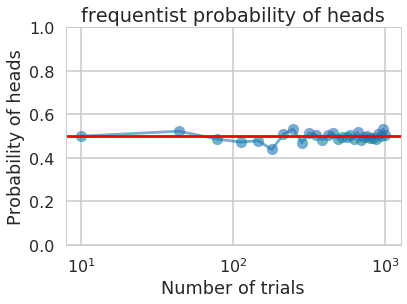

In [4]:
#alternate way of avoiding multiple lines in for loop 

plt.plot(Trials, [float("{0:.3f}".format(np.sum(coin_toss(N)=='H')/N,3)) for N in Trials], 'o-',alpha=0.6);
plt.ylim(0,1);
plt.xscale('log');
plt.axhline(0.5,0,1,color='r');
plt.xlabel('Number of trials');
plt.ylabel('Probability of heads');
plt.title('frequentist probability of heads');

Results are different since each time random values are generated

# Now lets learn to play a bit with frequency and probability distributions using scipy. 


In [5]:
df=pd.read_csv("quakes.csv",names=['id','Latitude','Longitude','Depth','Magnitude','Stations'])
del df['id']
df.head()

,Latitude,Longitude,Depth,Magnitude,Stations
0,lat,long,depth,mag,stations
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26,184.1,42,5.4,43
4,-17.97,181.66,626,4.1,19


# Check for dataset types. 

In [6]:
df.dtypes

Latitude     object
Longitude    object
Depth        object
Magnitude    object
Stations     object
dtype: object

All are objects which is unlikely, convert them to numerics 

In [7]:
df['Latitude']= pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude']= pd.to_numeric(df['Longitude'], errors='coerce')
df['Depth']= pd.to_numeric(df['Depth'], errors='coerce')
df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')

df['Stations'] = pd.to_numeric(df['Stations'], errors='coerce')

In [8]:
df.dtypes
df.head()


,Latitude,Longitude,Depth,Magnitude,Stations
0,NaN,NaN,NaN,NaN,NaN
1,-20.42,181.62,562.0,4.8,41.0
2,-20.62,181.03,650.0,4.2,15.0
3,-26.00,184.10,42.0,5.4,43.0
4,-17.97,181.66,626.0,4.1,19.0


Find the correlation

In [9]:
df.corr()


,Latitude,Longitude,Depth,Magnitude,Stations
Latitude,1.000000,-0.364544,0.031026,-0.050462,-0.002221
Longitude,-0.364544,1.000000,0.144443,-0.173067,-0.053512
Depth,0.031026,0.144443,1.000000,-0.230638,-0.073515
Magnitude,-0.050462,-0.173067,-0.230638,1.000000,0.851182
Stations,-0.002221,-0.053512,-0.073515,0.851182,1.000000


As we thus see no significant correlation found. Lets now calculate a histogram of the magnitude and depths of earthquakes. 

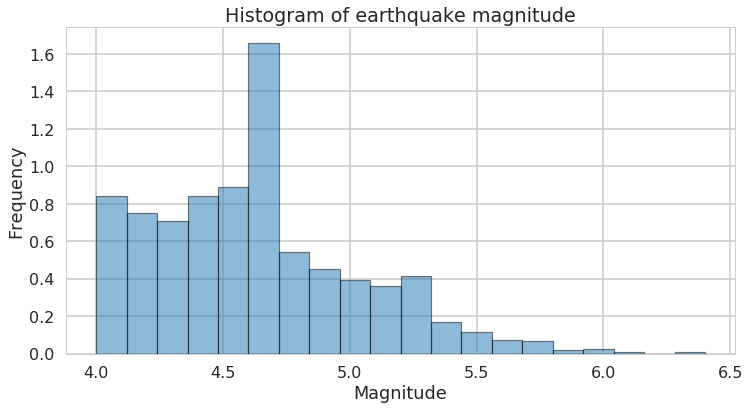

In [10]:
plt.figure(figsize=(12,6))
df.Magnitude.hist(alpha=0.5, bins='auto', ec='black',linewidth=1.2,normed=True);
plt.title("Histogram of earthquake magnitude");
plt.xlabel("Magnitude");
plt.ylabel('Frequency');

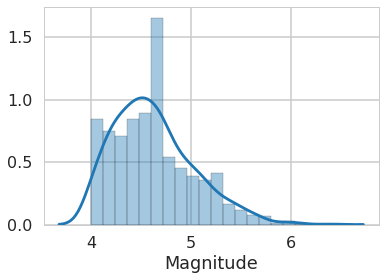

In [28]:
df2=df[df.Magnitude.notnull()]
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(df2.Magnitude)


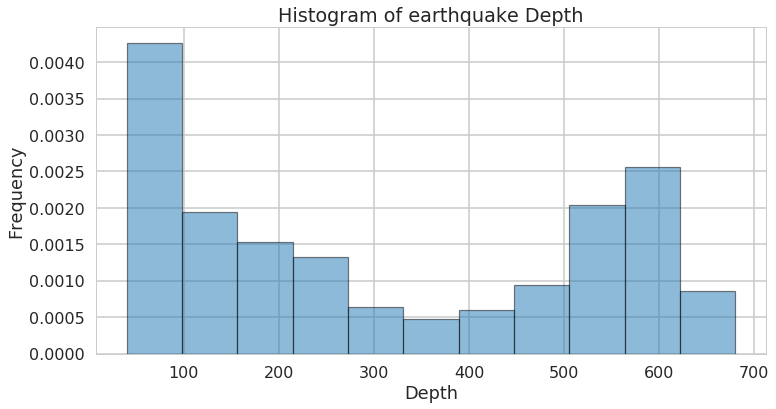

In [12]:
plt.figure(figsize=(12,6))
df.Depth.hist(alpha=0.5,histtype='bar', bins='auto', normed=True, ec='black',linewidth=1.2);
plt.title("Histogram of earthquake Depth");
plt.xlabel("Depth");
plt.ylabel('Frequency');

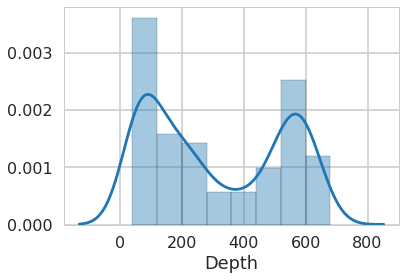

In [29]:
df2=df[df.Depth.notnull()]
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(df2.Depth)

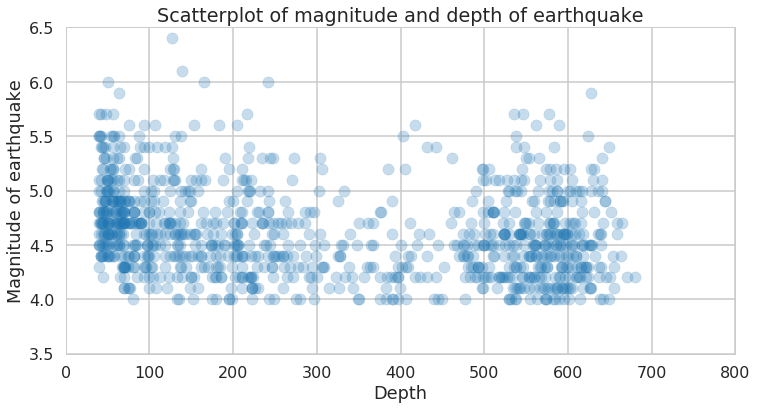

In [14]:
plt.figure(figsize=(12,6));
plt.scatter(df.Depth, df.Magnitude, alpha=0.25);
plt.title("Scatterplot of magnitude and depth of earthquake");
plt.ylabel("Magnitude of earthquake");
plt.xlabel('Depth');
plt.xlim(0,800);
plt.ylim(3.5,6.5);

Now we would want to search a probability distribution model for the magnitude of earthquake. Everytime we generally end up assuming any raw data conforming to normal distribution. However not always we turn out to be right. However for the sake of simplicity, lets just assume that the data follows normal distribution. Now we will see, if our data indeed follows normal distribution ! 
The histogram already made it apparent that it doesn't follow the normal distribution. 
Lets validate that with the help of $\textbf{QQ}$ plot

In [15]:
!conda install mpl-probscale

Fetching package metadata ...........

PackageNotFoundError: Packages missing in current channels:
            
  - mpl-probscale

We have searched for the packages in the following channels:
            
  - https://conda.anaconda.org/anaconda-fusion/linux-64
  - https://conda.anaconda.org/anaconda-fusion/noarch
  - https://repo.continuum.io/pkgs/free/linux-64
  - https://repo.continuum.io/pkgs/free/noarch
  - https://repo.continuum.io/pkgs/r/linux-64
  - https://repo.continuum.io/pkgs/r/noarch
  - https://repo.continuum.io/pkgs/pro/linux-64
  - https://repo.continuum.io/pkgs/pro/noarch
            



In [30]:
#import scipy.stats as stats
#import statsmodels.api as sm
#import pylab
#stats.probplot(df.Magnitude, dist="norm", plot=pylab, fit=True,line='45')
#sm.qqplot(df.Magnitude)
#sm.qqplot(df.Magnitude, dist="norm", a=0, loc=0, scale=1, fit=False, line='45', ax=None)



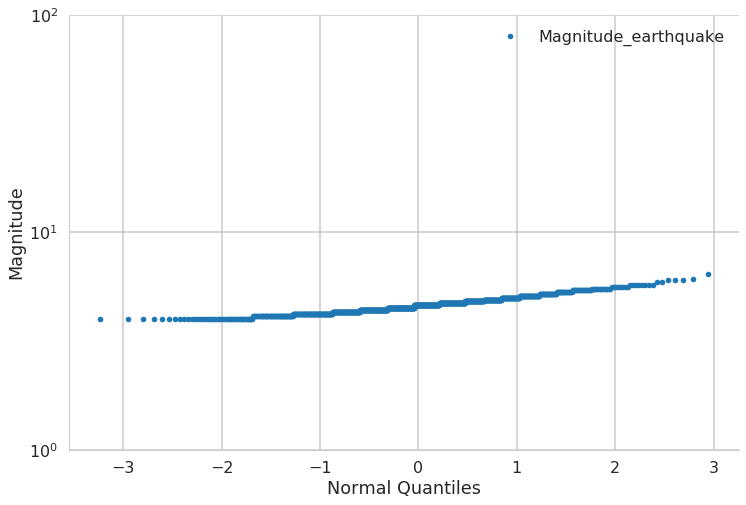

In [31]:
import probscale
position, mag = probscale.plot_pos(df['Magnitude'])
quantile = stats.norm.ppf(position)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(quantile, mag, marker='.', linestyle='none', label='Magnitude_earthquake')
ax.set_xlabel('Normal Quantiles')
ax.set_ylabel('Magnitude')
ax.set_yscale('log')
plt.legend(loc='best');

ax.set_ylim(bottom=1, top=100)
sns.despine()

# Lets now fit the probability distribution 

4.62039999999999 0.4027729708732516 0.4027729708732516
3.48422038434 3.84434732654 0.222733601829


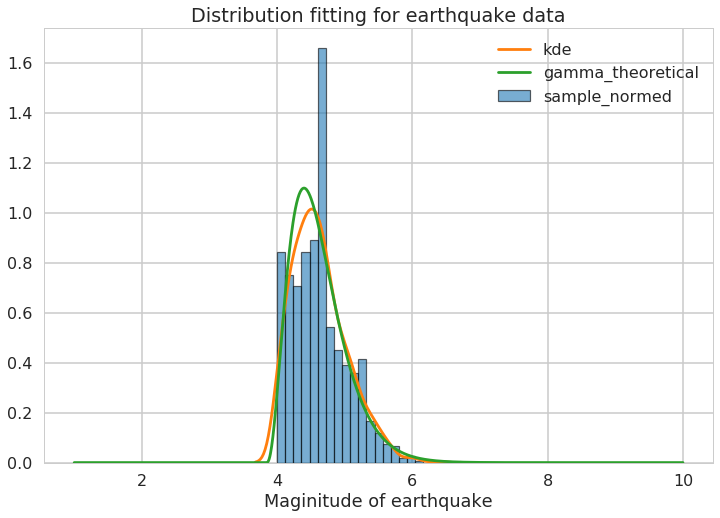

In [32]:
from scipy.stats import gamma
colors=sns.color_palette()
#calculate mean and sd of distribution
df_m=df[df.Magnitude.notnull()]
m=df_m.Magnitude.mean()
sd=sp.std(df_m.Magnitude,ddof=1)
sd1=np.std(df_m.Magnitude,ddof=1)
#calculate the parameters of the gamma distribution through fit
ag,bg,cg=sp.stats.gamma.fit(df_m.Magnitude)
print(m,sd,sd1)
print(ag,bg,cg)
x=np.linspace(1,10,1000)
plt.figure(figsize=(12,8))
pdf_gamma=sp.stats.gamma.pdf(x,ag,bg,cg)
plt.hist(df_m.Magnitude,bins='auto',ec='black',linewidth=1.2,normed=True,alpha=0.6, label="sample_normed");
#sns.distplot(df_m.Magnitude)
sns.kdeplot(df_m.Magnitude, label="kde");
plt.plot(x,pdf_gamma, label="gamma_theoretical");
plt.legend(loc='best');
plt.xlabel("Maginitude of earthquake");
plt.title("Distribution fitting for earthquake data")
plt.show();


In [19]:
def gamma_par(data):
    m1=np.mean(data)
    sd1=sp.std(data,ddof=1)
    shape = (m/sd)**2
    scale = (sd**2)/m
    return (shape, 0, scale)
ag1,bg1,cg1=gamma_par(df_m.Magnitude)
print(ag1,bg1,cg1)

131.59473491335285 0 0.03511082721540679


#Now lets figure out occurence of earthquake in a paticular latitude band 

In [20]:
df1=df[(df['Latitude']>= 20) & (df['Latitude']<= 18)]
df1.count()


Latitude     0
Longitude    0
Depth        0
Magnitude    0
Stations     0
dtype: int64

Lets plot the map to identify location of earthquakes

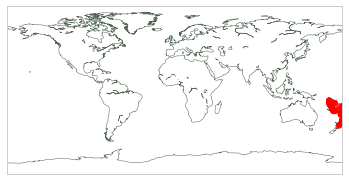

In [21]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(12,3));
fig, ax=plt.subplots()
earth=Basemap(ax=ax);
earth.drawcoastlines(color='#556655', linewidth=0.5);
ax.scatter(df['Longitude'], df['Latitude'], df['Magnitude'] ** 2, 
           c='red', alpha=0.5, zorder=10);

# Use different dataset 

In [22]:
df_s=pd.read_csv('usgs-4.5M-month-quakes.csv', names=['time','latitude','longitude','depth','mag','magType','nst','gap','dmin','rms','net','id','updated','place','type','horizontalError','depthError','magError','magNst','status','locationSource','magSource'])
del  df_s['nst'], df_s['magType'],df_s['magSource'],df_s['dmin'],df_s['status'],df_s['place'],df_s['rms'],df_s['updated'],df_s['type'],df_s['net'],df_s['id']

df_s['latitude'] = pd.to_numeric(df_s['latitude'], errors='coerce')
df_s['longitude']=pd.to_numeric(df_s['longitude'], errors='coerce')
df_s['depth'] = pd.to_numeric(df_s['depth'], errors='coerce')
df_s['mag'] = pd.to_numeric(df_s['mag'], errors='coerce')
df1=df_s[df_s.latitude.notnull()]
df1.head()

,time,latitude,longitude,depth,mag,gap,horizontalError,depthError,magError,magNst,locationSource
1,2016-03-18T22:46:56.680Z,49.6789,-129.8176,10.00,5.2,141,4.7,1.7,0.043,51,us
2,2016-03-18T16:11:00.230Z,37.9670,72.4553,10.00,5.4,54,5.1,1.8,0.068,73,us
3,2016-03-18T14:12:54.340Z,28.9015,143.0875,34.72,5.1,127,8.7,5.4,0.069,69,us
4,2016-03-18T14:10:12.220Z,-10.1886,160.9229,43.16,5.1,84,10.1,8.2,0.093,37,us
5,2016-03-18T12:49:14.880Z,-12.4869,166.5309,42.26,5.5,34,5.3,4.9,0.049,40,us


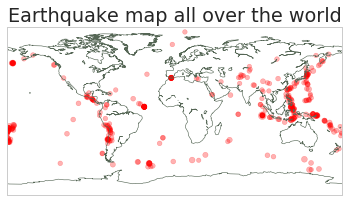

In [23]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(12,1))
fig, ax=plt.subplots()
earth=Basemap(ax=ax);
earth.drawcoastlines(color='#556655', linewidth=0.6);
ax.scatter(df1['longitude'], df1['latitude'], df1['mag'] ** 2,c='red',alpha=0.3);
plt.title("Earthquake map all over the world")
fig.savefig('usgs-monthly-4.5M.png')

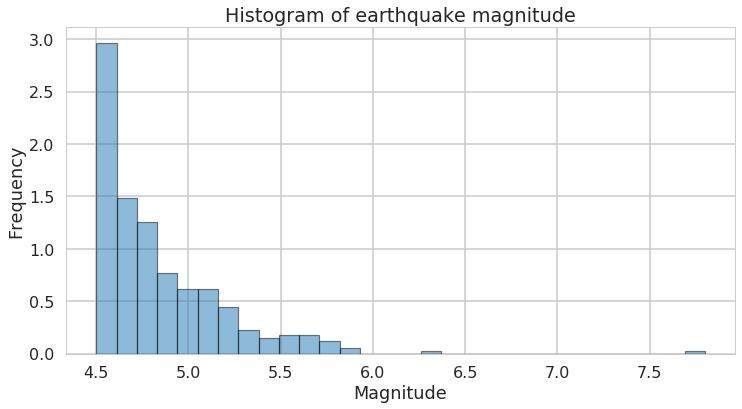

In [24]:
plt.figure(figsize=(12,6)) 
df_s.mag.hist(alpha=0.5, ec='black',bins='auto', normed=True,linewidth=1.2);
plt.title("Histogram of earthquake magnitude");
plt.xlabel("Magnitude");
plt.ylabel('Frequency');

In [25]:
df1.shape

(368, 11)

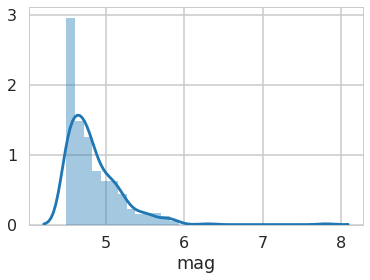

In [26]:
sns.distplot(df1.mag)